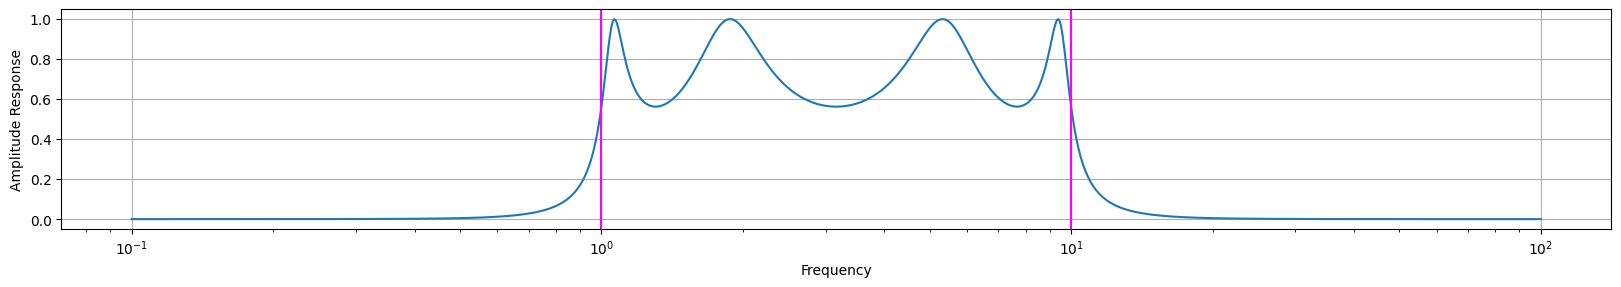

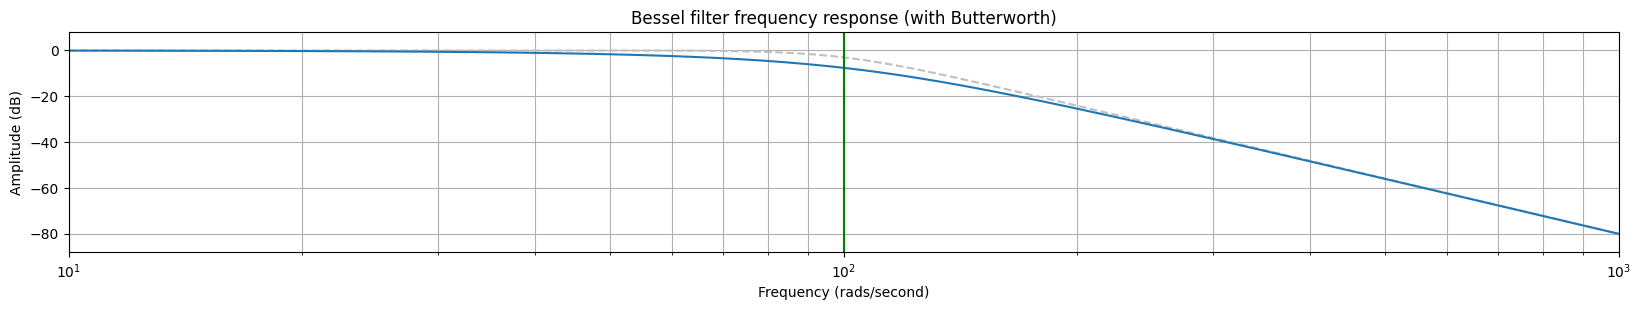

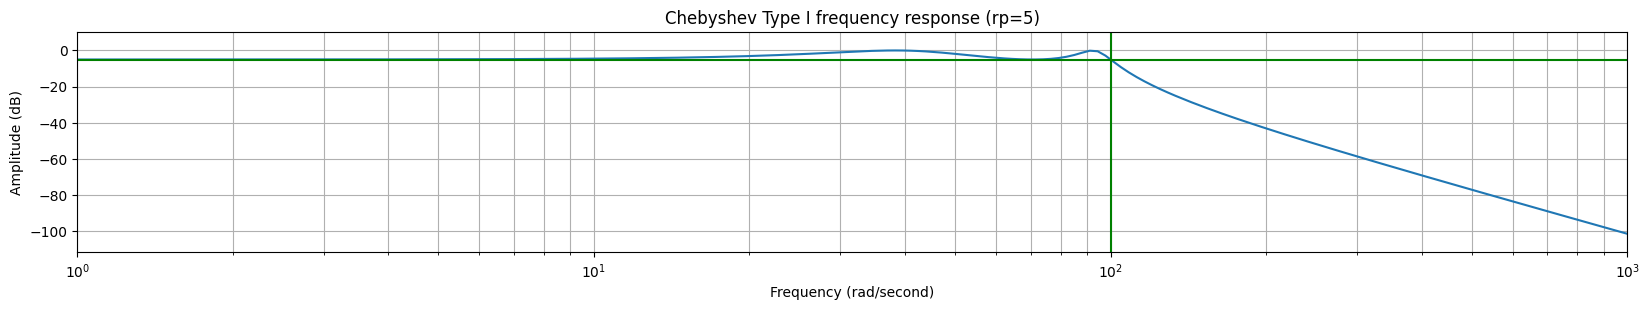

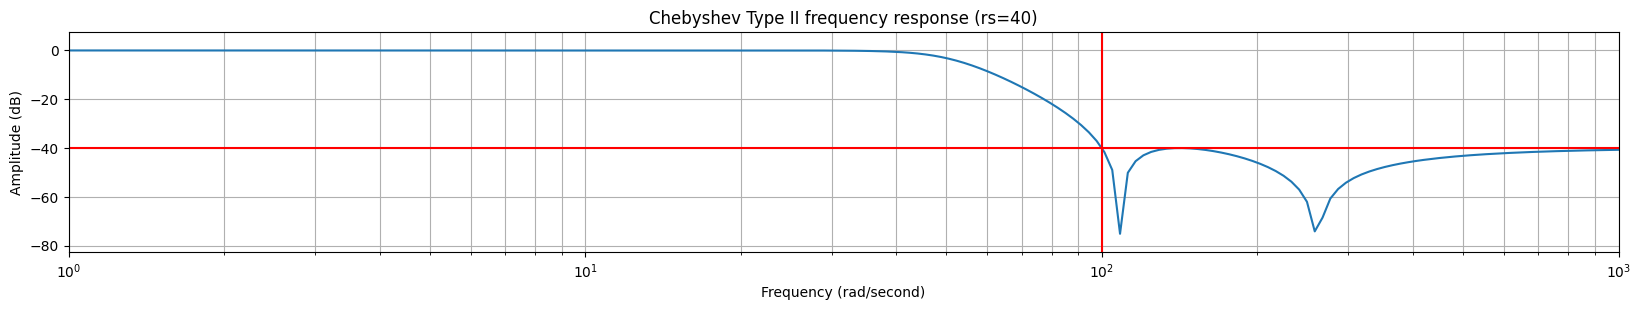

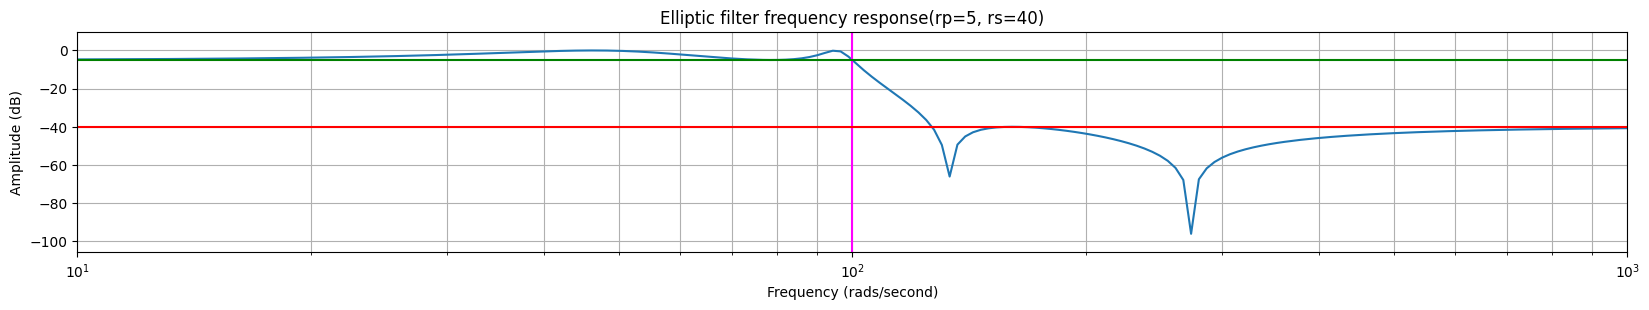

In [ ]:
from scipy.signal import freqs, iirfilter
from scipy import signal
from matplotlib import pyplot as plt
import numpy as np

#for analog filter the cuttoff_freq should be specified in rad/sec
#amount of taps = amount of poles in analgue circiut

#IIR filter
taps = 4
pass_band_freq = [1,10]
ripples_amout = 5
attenuation_amount = 40
b,a = iirfilter(taps, pass_band_freq, ripples_amout, attenuation_amount, analog =True, ftype='cheby1')
# w is a freq in radian/sec for freqS, while freqZ returbs Hz
w,h= freqs(b,a, worN=np.logspace(-1,2,1000))

plt.figure(figsize=(20, 20))
plt.subplot(6, 1, 1)
plt.semilogx(w,abs(h))
plt.xlabel('Frequency')
plt.ylabel('Amplitude Response')
plt.axvline(pass_band_freq[0],color='magenta')
plt.axvline(pass_band_freq[1],color='magenta')
plt.grid()
plt.show()

#Butterworth
taps = 4
cuttoff_freq = 100
b,a= signal.butter(taps, cuttoff_freq, 'low', analog=True)
w,h = signal.freqs(b,a)

plt.figure(figsize=(20, 20))
plt.subplot(6, 1, 2)
plt.plot(w,20*np.log10(abs(h)), color='silver', ls='dashed')

#Bessel (plot together with Butterworth)
b,a= signal.bessel(taps,cuttoff_freq,'low',analog=True)
w,h = signal.freqs(b,a)
plt.plot(w,20*np.log10(abs(h)))
plt.xscale('log')
plt.title("Bessel filter frequency response (with Butterworth)")
plt.xlabel("Frequency (rads/second)")
plt.ylabel("Amplitude (dB)")
plt.margins(0,0.1)
plt.grid(which='both', axis='both')
plt.axvline(cuttoff_freq,color='green')
plt.show()

#Chebyshew 1
taps = 4
cuttoff_freq = 100
ripples_amout = 5
b,a = signal.cheby1(taps, ripples_amout, cuttoff_freq, 'low', analog=True)
w,h = signal.freqs(b,a)

plt.figure(figsize=(20, 20))
plt.subplot(6, 1, 3)
plt.plot(w,20*np.log10(abs(h)))
plt.xscale('log')
plt.title("Chebyshev Type I frequency response (rp=5)")
plt.xlabel("Frequency (rad/second)")
plt.ylabel("Amplitude (dB)")
plt.margins(0,0.1)
plt.grid(which='both', axis='both')
plt.axvline(cuttoff_freq,color='green')
plt.axhline(-ripples_amout,color='green')
plt.show()

#Chebyshew 2
taps = 4
cuttoff_freq = 100
attenuation_amount = 40
b,a = signal.cheby2(taps, attenuation_amount, cuttoff_freq, 'low', analog=True)
w,h = signal.freqs(b,a)

plt.figure(figsize=(20, 20))
plt.subplot(6, 1, 4)
plt.plot(w,20*np.log10(abs(h)))
plt.xscale('log')
plt.title("Chebyshev Type II frequency response (rs=40)")
plt.xlabel("Frequency (rad/second)")
plt.ylabel("Amplitude (dB)")
plt.margins(0,0.1)
plt.grid(which='both', axis='both')
plt.axvline(cuttoff_freq,color='red')
plt.axhline(-attenuation_amount,color='red')
plt.show()

#Elleptic
taps = 4
cuttoff_freq = 100
ripples_amout = 5
attenuation_amount = 40
b,a = signal.ellip(taps, ripples_amout, attenuation_amount, cuttoff_freq, 'low', analog=True)
w,h = signal.freqs(b,a)

plt.figure(figsize=(20, 20))
plt.subplot(6, 1, 5)
plt.xscale('log')
plt.plot(w,20*np.log10(abs(h)))
plt.title("Elliptic filter frequency response(rp=5, rs=40)")
plt.xlabel("Frequency (rads/second)")
plt.ylabel("Amplitude (dB)")
plt.margins(0,0.1)
plt.grid(which='both', axis='both')

plt.axvline(cuttoff_freq,color='magenta')
plt.axhline(-attenuation_amount,color='red')
plt.axhline(-ripples_amout,color='green')

plt.show()